In [ ]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns



In [ ]:
#Read the csv files
train_data = pd.read_csv('/train.csv')
train_df = pd.DataFrame(train_data)
test_data = pd.read_csv('/test.csv')
test_df = pd.DataFrame(test_data)

In [ ]:
train_df

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,56.5,0.26,322.2,194.3,126,1,0,0,1,3,2,4,Male,False,True,MS,510,402-5509
1,84.0,0.46,279.1,170.9,92,0,0,0,1,2,2,3,Male,False,False,OH,510,370-3021
2,96.0,0.00,294.7,306,96,1,1,0,0,2,3,3,Female,True,False,MI,415,373-1448
3,62.0,0.00,255.4,185.6,100,2,0,0,0,2,2,3,Male,False,False,VT,510,403-1769
4,45.0,0.28,300.6,197.9,154,0,0,0,1,3,2,5,Male,False,True,WV,408,405-9384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,83.0,0.29,276.1,193.5,97,2,0,0,1,2,2,3,Male,True,True,ID,510,399-7029
2662,71.0,0.00,154.7,230.1,135,5,1,0,0,1,3,4,Male,False,False,OK,408,345-1524
2663,82.0,0.00,221.9,92.2,113,3,0,0,0,2,2,4,Male,False,True,MA,415,419-2767
2664,79.5,0.42,279.3,158.2,113,0,0,0,1,2,2,4,Male,False,True,VT,415,403-5552


In [ ]:
test_df

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone
0,57.5,0.25,330.1,167.4,100,1,0,1,3,2,3,Male,True,True,KS,415,382-4657
1,84.0,0.00,231.7,118.3,101,3,1,0,2,2,3,Male,False,True,OK,415,330-6626
2,89.0,0.00,194.1,198.5,127,4,0,0,2,2,4,Male,False,True,IN,415,329-6603
3,56.5,0.00,248.0,42.9,95,0,0,0,2,1,3,Male,False,True,AZ,415,358-1958
4,66.0,0.00,175.4,107.3,77,2,0,0,1,2,3,Female,False,True,SC,415,350-2565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,74.5,0.00,255.4,62.0,136,2,0,0,2,1,4,Male,False,False,NY,415,363-1123
663,31.0,0.00,294.9,114.4,142,2,0,0,2,2,4,Male,True,True,SC,408,406-6304
664,77.0,0.00,243.7,203.7,91,1,0,0,2,2,3,Male,False,True,MO,415,373-7713
665,77.0,0.00,180.4,179.9,159,3,0,0,1,2,5,Male,True,False,WY,415,378-6924


In [ ]:
#Make copy of train/test sets to clean
edit_train = train_data.copy()
edit_test = test_data.copy()

#Test to see whether there are null values
edit_train.isnull().sum() #Running this shows there is one null value in the max_discount column
edit_test.isnull().sum() #No null values in the test set

#Dropping the singular null max_discount from the train set
edit_train.drop(edit_train[edit_train.isnull().any(axis=1)].index, inplace = True)
edit_train.isnull().sum() #Now running this command gives us zero null values for all columns


last_purchase      0
max_discount       0
shoe_spend         0
apparell_spend     0
acc_spend          0
custserv_calls     0
churn              0
acc_purchasers     0
promo_purchaser    0
shoe_orders        0
apparel_orders     0
acc_orders         0
gender             0
ecommShopper       0
bhShopper          0
state              0
area_code          0
phone              0
dtype: int64

In [ ]:
edit_train.info()#Running this line shows the data type for every attribute, 
#One problem with the output of the previous line is that the 'apparell_spend' attribute is listed as type "object" instead of an "float64"
#To make this change, we first need to find every index that does not have a numeric value:
index = []
apparell_spend_index = pd.Series(edit_train['apparell_spend'])
for i in apparell_spend_index:
  if i.isalpha():
    print(edit_train[edit_train['apparell_spend']==i].index.values)
index #running this line indicates that 707 is the only row where 'apparell_spend' is a string with a character

#We can drop this value
edit_train.drop(707, inplace = True)
edit_train['apparell_spend'] = pd.to_numeric(edit_train['apparell_spend']) #This command converts 'apparell_spend' into float64
edit_train.info() #This confirms it's 'float64'


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2665
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_purchase    2665 non-null   float64
 1   max_discount     2665 non-null   float64
 2   shoe_spend       2665 non-null   float64
 3   apparell_spend   2665 non-null   object 
 4   acc_spend        2665 non-null   int64  
 5   custserv_calls   2665 non-null   int64  
 6   churn            2665 non-null   int64  
 7   acc_purchasers   2665 non-null   int64  
 8   promo_purchaser  2665 non-null   int64  
 9   shoe_orders      2665 non-null   int64  
 10  apparel_orders   2665 non-null   int64  
 11  acc_orders       2665 non-null   int64  
 12  gender           2665 non-null   object 
 13  ecommShopper     2665 non-null   bool   
 14  bhShopper        2665 non-null   bool   
 15  state            2665 non-null   object 
 16  area_code        2665 non-null   int64  
 17  phone         

In [ ]:
#Next, we want to drop values that aren't relevant. Consider phone-number, it is largely random given an area code.
#If two people have a similar number, that does not indicate any possible pattern. It is possible that area code has some relevance, i.e 
#there might be many stores in an area. However, the same area code can exist in multiple states. This would complicate the model, so it's best to remove it

edit_train.drop(['phone','area_code'], inplace = True, axis = 1)
edit_test.drop(['phone','area_code'],inplace = True, axis = 1)


last_purchase     -0.020223
max_discount      -0.109476
shoe_spend         0.220167
apparell_spend     0.102908
acc_spend          0.071385
custserv_calls     0.199122
churn              1.000000
acc_purchasers     0.260189
promo_purchaser   -0.123330
shoe_orders        0.233575
apparel_orders     0.088330
acc_orders         0.056979
gender            -0.043288
ecommShopper      -0.007663
bhShopper         -0.005823
state              0.003564
Name: churn, dtype: float64

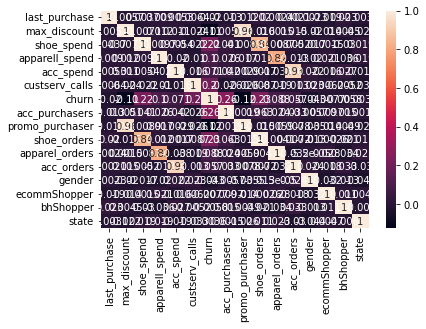

In [ ]:
#We want to figure out which variables have the highest correlation with churn, since we want
#these variables should have a larger impact on the model than others

from seaborn.matrix import heatmap
from sklearn.preprocessing import OrdinalEncoder

#To do this, I will implement a heatmap. Since heatmap can't use strings as values, we need to ordinally encode these values. This needs to be done for the test as well
edit_train[['gender','ecommShopper','bhShopper','state']] = OrdinalEncoder().fit_transform(edit_train[['gender','ecommShopper','bhShopper','state']])
edit_test[['gender','ecommShopper','bhShopper','state']] = OrdinalEncoder().fit_transform(edit_test[['gender','ecommShopper','bhShopper','state']])



#Construct the heatmap
corrmap = edit_train.corr()
feature = corrmap.index
#plot heat map
sns.heatmap(edit_train[feature].corr(), annot = True)
corrmap['churn'] #Constructing the heatmap shows that all attributes have a correlation with churn between -0.3 and 0.3. This is weak correlation,
#so there is no reason to heavily emphasize one attribute over another


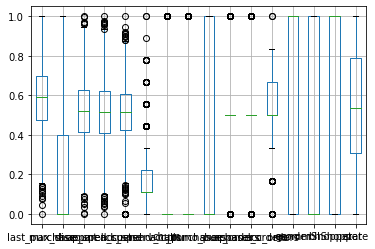

In [ ]:
#Check for attributes with many outliers
edit_train.boxplot()  #the boxplot shows that most variables don't contain outliers, three attributes are worth looking into:  
edit_train['shoe_spend'].kurt()
edit_train['apparell_spend'].kurt()
edit_train['acc_spend'].kurt()
#The kurtosis of these three attributes is very small. The absolute value was at most 0.66, so we don't need to do anything to remove them
for i in edit_train.columns:
  sns.distplot(edit_train[i])
#The histograms all show that no attribute has considerable skew either, so we are almost able to build a model.

In [ ]:
#The last thing to do before implementing a model is to normalize the data. Consider the numerical values of shoe_spend, apparell_spend, acc_spend,
#the values are numerically significantly larger than that of other numerical values. To remove this bias, we will min-max scale the dataset

#This method will reduce all values to the range of [0,1] 
for column in edit_train.columns:
    edit_train[column] = (edit_train[column] - edit_train[column].min()) / (edit_train[column].max() - edit_train[column].min())
#Repeating this process for the test set:
for column in edit_test.columns:
    edit_test[column] = (edit_test[column] - edit_test[column].min()) / (edit_test[column].max() - edit_test[column].min())
edit_train 

,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,churn,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state
0,0.466942,0.52,0.741638,0.584090,0.630,0.111111,0.0,0.0,1.0,1.0,0.5,0.666667,1.0,0.0,1.0,0.519231
1,0.694215,0.92,0.617359,0.513309,0.460,0.000000,0.0,0.0,1.0,0.5,0.5,0.500000,1.0,0.0,0.0,0.711538
2,0.793388,0.00,0.662341,0.921960,0.480,0.111111,1.0,0.0,0.0,0.5,1.0,0.500000,0.0,1.0,0.0,0.461538
3,0.512397,0.00,0.549020,0.557774,0.500,0.222222,0.0,0.0,0.0,0.5,0.5,0.500000,1.0,0.0,0.0,0.923077
4,0.371901,0.56,0.679354,0.594979,0.770,0.000000,0.0,0.0,1.0,1.0,0.5,0.833333,1.0,0.0,1.0,0.980769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.685950,0.58,0.608708,0.581670,0.485,0.222222,0.0,0.0,1.0,0.5,0.5,0.500000,1.0,1.0,1.0,0.288462
2662,0.586777,0.00,0.258651,0.692377,0.675,0.555556,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.730769
2663,0.677686,0.00,0.452422,0.275257,0.565,0.333333,0.0,0.0,0.0,0.5,0.5,0.666667,1.0,0.0,1.0,0.403846
2664,0.657025,0.84,0.617935,0.474894,0.565,0.000000,0.0,0.0,1.0,0.5,0.5,0.666667,1.0,0.0,1.0,0.923077


In [ ]:
from sklearn.model_selection import train_test_split

#I'll 80-20 split the training data to see the accuracy of the model
train, test = train_test_split(edit_train, test_size = 0.2, random_state=0)
inputs = [column for column in edit_train.columns if column != 'churn']


['last_purchase',
 'max_discount',
 'shoe_spend',
 'apparell_spend',
 'acc_spend',
 'custserv_calls',
 'acc_purchasers',
 'promo_purchaser',
 'shoe_orders',
 'apparel_orders',
 'acc_orders',
 'gender',
 'ecommShopper',
 'bhShopper',
 'state']

In [ ]:
#Given how high dimensional and how many attributes the dataset has, I'll choose a Random Forest model  
from sklearn.ensemble import RandomForestClassifier

#To find the optimal number of trees, I'll test 0-500 trees by increments of 50 
acc = {}
for i in range(50,500, 50):
  forst = RandomForestClassifier(n_estimators = i)
  forst.fit(train[inputs], train['churn'])
  acc[i] = [forst.score(train[inputs], train['churn']),forst.score(test[inputs], test['churn'])]
acc 
#This shows that the accuracy of the test set is optimal around 200 trees. 


{50: [0.999530736743313, 0.9455909943714822],
 100: [1.0, 0.9474671669793621],
 150: [1.0, 0.949343339587242],
 200: [1.0, 0.9530956848030019],
 250: [1.0, 0.9512195121951219],
 300: [1.0, 0.9474671669793621],
 350: [1.0, 0.9474671669793621],
 400: [1.0, 0.9437148217636022],
 450: [1.0, 0.9474671669793621]}

In [ ]:
#Now I'll test boosted models

#The first one I'll try is AdaBoost 
from sklearn.ensemble import AdaBoostClassifier

ada_acc = {}
for i in range(25,150, 25):
  ada = AdaBoostClassifier(n_estimators=i)
  ada.fit(train[inputs], train['churn'])
  ada_acc[i] = [ada.score(train[inputs], train['churn']),ada.score(test[inputs], test['churn'])]
ada_acc #This gives us very low accuracy compared to the random forest. At most, the accuracy is 0.8949....



{25: [0.8812763960581886, 0.8911819887429644],
 50: [0.8850305021116847, 0.8949343339587242],
 75: [0.8869075551384327, 0.8930581613508443],
 100: [0.8925387142186767, 0.8818011257035647],
 125: [0.8920694509619896, 0.8780487804878049]}

In [ ]:
#The next one I'll try is GradientBoost
from sklearn.ensemble import GradientBoostingClassifier

grad_acc = {}
for i in range(25,200,25):
  grad = GradientBoostingClassifier(n_estimators=i)
  grad.fit(train[inputs], train['churn'])
  grad_acc[i] = [grad.score(train[inputs], train['churn']),grad.score(test[inputs], test['churn'])]
grad_acc #The accuracy is comparable to the random forest model, so there's no reason to differ.

{25: [0.9389957766306898, 0.9455909943714822],
 50: [0.9474425152510558, 0.949343339587242],
 75: [0.9530736743312999, 0.9474671669793621],
 100: [0.9572970436414828, 0.9512195121951219],
 125: [0.9601126231816048, 0.9474671669793621],
 150: [0.9638667292351009, 0.9474671669793621],
 175: [0.9680900985452839, 0.9437148217636022]}

In [ ]:
#Thus, we can stick to using a random forest with the number of estimators to 200. All that's left is to predict the churn value for the real test set
forst_final = RandomForestClassifier(n_estimators = 200)
forst_final.fit(train[inputs], train['churn'])

test_data['churn'] = forst_final.predict(edit_test)  #This command makes the prediction for the test set and adds it as a new column to the test data
test_data.to_csv('test_new.csv') #This constructs the new test csv with the updated churn values


,last_purchase,max_discount,shoe_spend,apparell_spend,acc_spend,custserv_calls,acc_purchasers,promo_purchaser,shoe_orders,apparel_orders,acc_orders,gender,ecommShopper,bhShopper,state,area_code,phone,churn
0,57.5,0.25,330.1,167.4,100,1,0,1,3,2,3,Male,True,True,KS,415,382-4657,0.0
1,84.0,0.00,231.7,118.3,101,3,1,0,2,2,3,Male,False,True,OK,415,330-6626,0.0
2,89.0,0.00,194.1,198.5,127,4,0,0,2,2,4,Male,False,True,IN,415,329-6603,1.0
3,56.5,0.00,248.0,42.9,95,0,0,0,2,1,3,Male,False,True,AZ,415,358-1958,0.0
4,66.0,0.00,175.4,107.3,77,2,0,0,1,2,3,Female,False,True,SC,415,350-2565,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,74.5,0.00,255.4,62.0,136,2,0,0,2,1,4,Male,False,False,NY,415,363-1123,0.0
663,31.0,0.00,294.9,114.4,142,2,0,0,2,2,4,Male,True,True,SC,408,406-6304,0.0
664,77.0,0.00,243.7,203.7,91,1,0,0,2,2,3,Male,False,True,MO,415,373-7713,0.0
665,77.0,0.00,180.4,179.9,159,3,0,0,1,2,5,Male,True,False,WY,415,378-6924,0.0
